
--- First 5 rows of the dataset ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


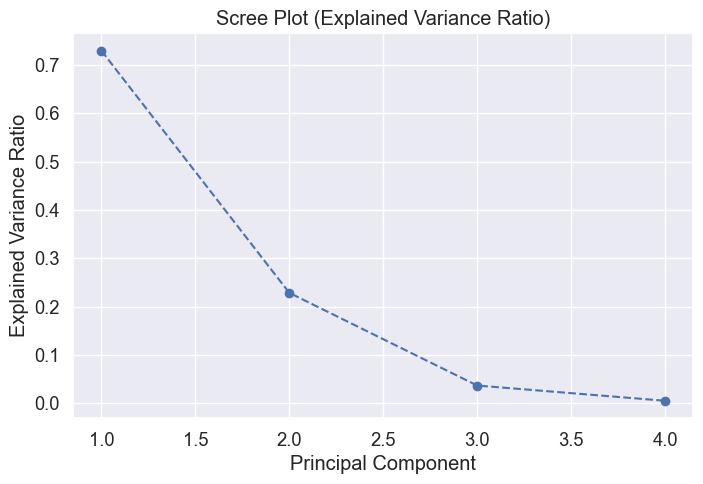


--- Explained Variance Ratio ---
PC1: 0.7296
PC2: 0.2285
PC3: 0.0367
PC4: 0.0052

Choosing number of components = 2

--- Shape of reduced data ---
(150, 2)


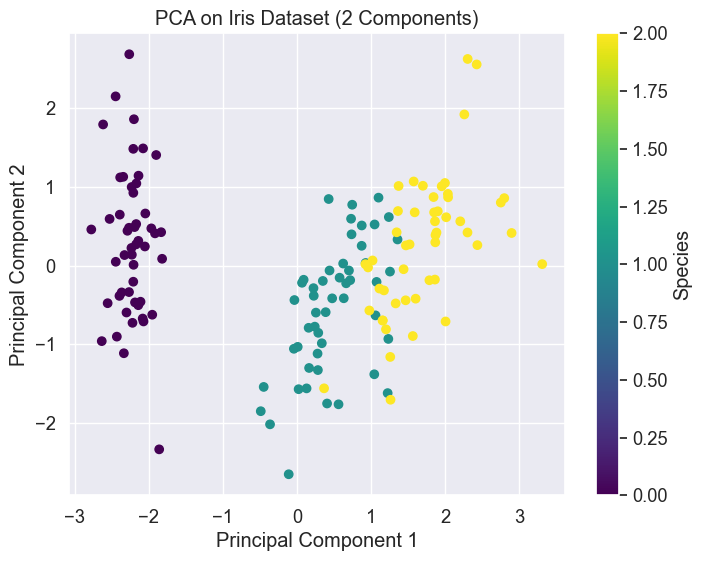


--- Interpretation ---
• PCA reduced the dataset from 4 dimensions to 2.
• PC1 and PC2 capture most of the variance (information) in the dataset.
• The scatter plot shows that PCA effectively separates the species.
• Some information loss occurs because only 2 PCs are used instead of all 4.
• PCA helps in visualization and reduces noise, but reduces exact feature interpretability.



In [20]:
# -------------------------------------------------------------
# Step 1: Import Libraries
# -------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# -------------------------------------------------------------
# Step 2: Load the Dataset (Iris)
# -------------------------------------------------------------
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
target = iris.target

print("\n--- First 5 rows of the dataset ---")
print(df.head())

# -------------------------------------------------------------
# Step 3: Standardize the Data
# -------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# -------------------------------------------------------------
# Step 4: Apply PCA (Initial PCA - Full Components)
# -------------------------------------------------------------
pca_full = PCA()
pca_full.fit(X_scaled)
X_pca_full = pca_full.transform(X_scaled)

# -------------------------------------------------------------
# Step 5: Explained Variance Ratio (Scree Plot)
# -------------------------------------------------------------
explained_variance = pca_full.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1),
         explained_variance,
         marker='o', linestyle='--')
plt.title("Scree Plot (Explained Variance Ratio)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

print("\n--- Explained Variance Ratio ---")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f}")

# -------------------------------------------------------------
# Step 6: Choose the Number of Components
# -------------------------------------------------------------
# Based on the typical scree plot, PC1+PC2 explain ~95% variance
n_components = 2
print(f"\nChoosing number of components = {n_components}")

# -------------------------------------------------------------
# Step 7: Apply PCA with Chosen Components
# -------------------------------------------------------------
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print("\n--- Shape of reduced data ---")
print(X_pca.shape)

# -------------------------------------------------------------
# Step 8: Visualize the Reduced Data
# -------------------------------------------------------------
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target, cmap='viridis')
plt.title("PCA on Iris Dataset (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Species")
plt.grid(True)
plt.show()

# -------------------------------------------------------------
# Step 9: Interpretation
# -------------------------------------------------------------
print("""
--- Interpretation ---
• PCA reduced the dataset from 4 dimensions to 2.
• PC1 and PC2 capture most of the variance (information) in the dataset.
• The scatter plot shows that PCA effectively separates the species.
• Some information loss occurs because only 2 PCs are used instead of all 4.
• PCA helps in visualization and reduces noise, but reduces exact feature interpretability.
""")
